# Capstone Project on Credit Card Fraud Detection by Machine Learning Model

### Mukhtar Ahmad
### mukhtar.wimc@gmail.com
### 17th May 2024 batch


# About dataset
"""
"Believe you can and you're halfway there."
Trainer: Mouna N from Learnbay
Credit Card Fraud Detection
Dataset Overview
Introduction
Credit card fraud detection is a critical problem in the finance industry. Fraudulent transactions can cause significant financial losses and undermine customer trust. In this project, we develop a machine learning model to detect fraudulent credit card transactions using a dataset of anonymised transactions.
Dataset Summary
 Total Rows: 100,000
 Total Features: 21 (including the target variable)
 Purpose: The dataset is designed for credit risk assessment, specifically to predict whether a borrower will default on a loan based on their financial and personal information.
1. Dataset Composition
The dataset includes 20 independent variables (features) and 1 target variable (default). These features can be categorized into three main groups:
1. Personal & Demographic Information – Age, employment status, education level, home ownership, marital status, number of dependents.
2. Financial Features – Income, loan amount, loan term, interest rate, debt-to-income ratio, monthly expenses, annual savings, retirement savings.
3. Credit History Features – Credit score, credit history length, number of credit lines, late payments, bankruptcies.
Target Variable (default)
 Binary Variable:
o 0 = Loan was repaid successfully (No Default).
o 1 = Borrower failed to repay the loan (Default).
 The dataset is balanced, with approximately 50% defaults and 50% non-defaults.
2. Features (Independent Variables)
Demographic Features
1. age (integer, 21–65 years)- Age of the borrower. Older individuals may have a longer credit history, impacting risk assessment.
2. num_of_dependents (integer, 0–4)- Number of dependents (e.g., children, spouse, elderly parents). More dependents can impact financial stability.
3. education_level (categorical: "high_school", "bachelor", "master", "phd") -Highest level of education attained. Higher education may be correlated with higher income and financial stability.
4. marital_status (categorical: "single", "married", "divorced") - Marital status of the borrower. Married individuals may have joint income but also higher expenses.
Financial Features
5. income (integer, $20,000–$100,000)- Annual income of the borrower. Higher income generally reduces the risk of default.
6. loan_amount (integer, $1,000–$50,000)- Amount of money borrowed. Larger loans may carry a higher risk of default.
"Believe you can and you're halfway there."
Trainer: Mouna N from Learnbay
7. loan_term (categorical: 12, 24, 36, 48, 60 months)- Duration of the loan in months. Longer terms may increase risk due to financial uncertainty.
8. interest_rate (float, 3.5%–15.0%)- Annual interest rate on the loan. Higher rates increase repayment burden.
9. debt_to_income_ratio (float, 10%–50%)- Ratio of total debt payments to income. Higher values indicate financial stress.
10. home_ownership (categorical: "own", "rent", "mortgage")- Indicates whether the borrower owns a home, rents, or has a mortgage. Homeowners may have more financial stability.
Credit History Features
11. credit_score (integer, 300–850)- Numerical representation of the individual's creditworthiness. Higher scores indicate lower risk.
12. credit_history_length (integer, 1–30 years)- Number of years the borrower has had a credit history. Longer history generally means better creditworthiness.
13. num_credit_lines (integer, 1–20)- Number of active credit lines (e.g., credit cards, loans). Too many or too few can be risky.
14. late_payments (integer, 0–9)- Number of late payments in the borrower's credit history. More late payments increase default risk.
15. bankruptcies (integer, 0–2)- Number of past bankruptcies. Even a single bankruptcy significantly increases the risk of default.
Savings & Expense Features
16. annual_savings (integer, $500–$50,000)- Amount saved annually. Higher savings indicate financial stability.
17. retirement_savings (integer, $1,000–$200,000)- Money saved for retirement. Indicates long-term financial planning.
18. monthly_expenses (integer, $500–$10,000)- Total monthly expenses. Higher expenses relative to income may increase risk.
Employment Features
19. employment_status (categorical: "employed", "unemployed", "self-employed")
 Employment status of the borrower.
 Employed: Steady income source, lower risk.
 Unemployed: No stable income, high risk.
 Self-employed: Variable income, moderate risk.
"""

In [2]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import RandomizedSearchCV , cross_val_score

import warnings 
warnings.filterwarnings("ignore")



In [2]:
# Load the dataset from csv file

dataset = pd.read_csv("Credit Card Fraud Detection.csv")


In [3]:
# information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   age                    100000 non-null  int64  
 1   income                 100000 non-null  int64  
 2   loan_amount            100000 non-null  int64  
 3   credit_score           100000 non-null  int64  
 4   employment_status      100000 non-null  object 
 5   default(y)             100000 non-null  int64  
 6   loan_term              100000 non-null  int64  
 7   interest_rate          100000 non-null  float64
 8   debt_to_income_ratio   100000 non-null  float64
 9   num_of_dependents      100000 non-null  int64  
 10  education_level        100000 non-null  object 
 11  home_ownership         100000 non-null  object 
 12  marital_status         100000 non-null  object 
 13  credit_history_length  100000 non-null  int64  
 14  num_credit_lines       100000 non-nul

In [4]:
# check for the missing values in the dataset
dataset.isnull().sum()

age                      0
income                   0
loan_amount              0
credit_score             0
employment_status        0
default(y)               0
loan_term                0
interest_rate            0
debt_to_income_ratio     0
num_of_dependents        0
education_level          0
home_ownership           0
marital_status           0
credit_history_length    0
num_credit_lines         0
late_payments            0
bankruptcies             0
annual_savings           0
retirement_savings       0
monthly_expenses         0
dtype: int64

In [5]:
# check for the duplicate rows
dataset.duplicated().sum()

0

In [6]:
# check for descriptive values of the featues
dataset.describe(include="all")

,age,income,loan_amount,credit_score,employment_status,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,home_ownership,marital_status,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
count,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000,100000,100000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
unique,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,4,3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,employed,NaN,NaN,NaN,NaN,NaN,high_school,rent,married,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,70310,NaN,NaN,NaN,NaN,NaN,39963,49973,49954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,42.462720,60012.224960,25519.561950,573.806760,NaN,0.500940,36.025560,9.254996,29.995874,1.997350,NaN,NaN,NaN,14.975920,10.012660,4.492340,0.059720,25221.936980,100743.644020,5253.344490
std,12.690258,23093.209173,14136.260198,158.581563,NaN,0.500002,16.964051,3.318369,11.563967,1.417576,NaN,NaN,NaN,8.369603,5.470983,2.872665,0.276973,14258.782992,57459.490883,2740.027792
min,21.000000,20000.000000,1000.000000,300.000000,NaN,0.000000,12.000000,3.500245,10.000275,0.000000,NaN,NaN,NaN,1.000000,1.000000,0.000000,0.000000,500.000000,1002.000000,500.000000
25%,31.000000,39935.750000,13311.750000,437.000000,NaN,0.000000,24.000000,6.377951,19.973035,1.000000,NaN,NaN,NaN,8.000000,5.000000,2.000000,0.000000,12912.750000,50855.500000,2874.750000
50%,42.000000,60175.000000,25583.000000,574.000000,NaN,1.000000,36.000000,9.269498,30.007073,2.000000,NaN,NaN,NaN,15.000000,10.000000,4.000000,0.000000,25230.500000,100694.500000,5263.000000
75%,53.000000,79991.000000,37771.000000,710.000000,NaN,1.000000,48.000000,12.113304,40.034245,3.000000,NaN,NaN,NaN,22.000000,15.000000,7.000000,0.000000,37514.000000,150403.750000,7631.000000


In [7]:
# separate numerical features and categorical features 

number_column =[]
categorical_column =[]
for cols in dataset.columns:
    if(dataset[cols].dtype == "int64" or dataset[cols].dtype == "float64"):
        number_column.append(cols)
    else:
        categorical_column.append(cols)
print(" numerical features\n" , number_column)
print(" categorical features \n", categorical_column)

 numerical features
 ['age', 'income', 'loan_amount', 'credit_score', 'default(y)', 'loan_term', 'interest_rate', 'debt_to_income_ratio', 'num_of_dependents', 'credit_history_length', 'num_credit_lines', 'late_payments', 'bankruptcies', 'annual_savings', 'retirement_savings', 'monthly_expenses']
 categorical features 
 ['employment_status', 'education_level', 'home_ownership', 'marital_status']


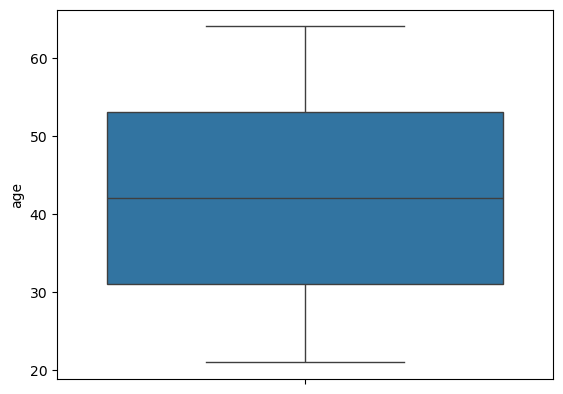

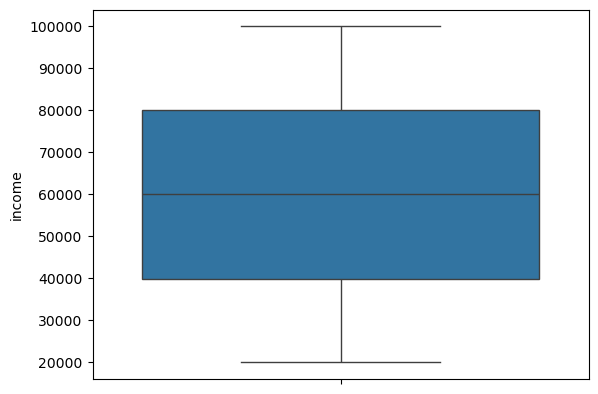

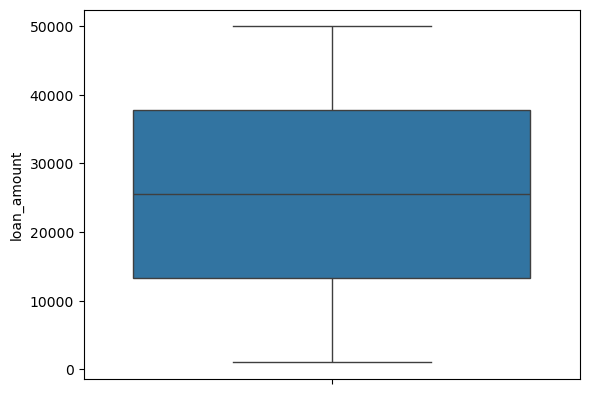

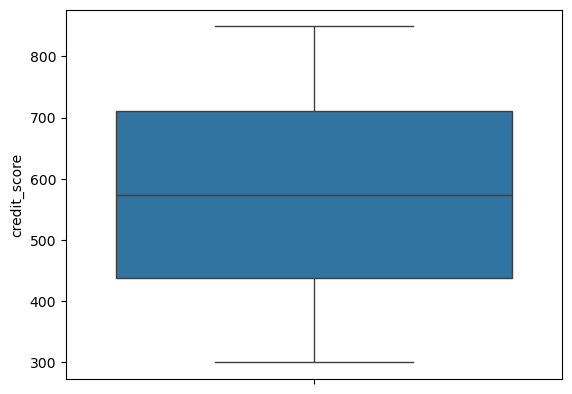

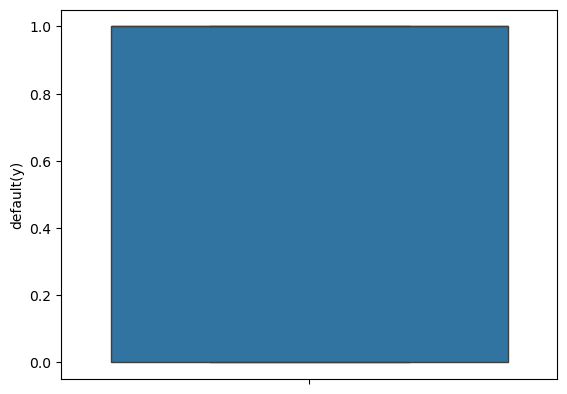

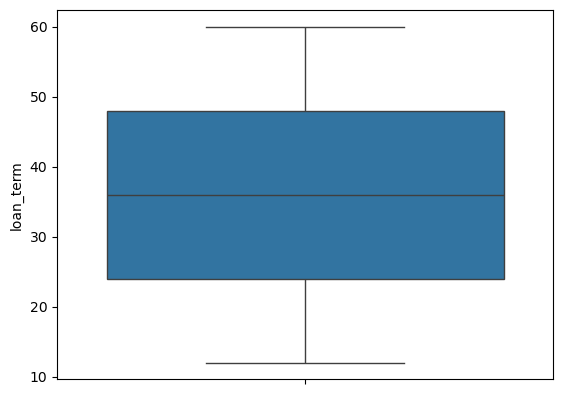

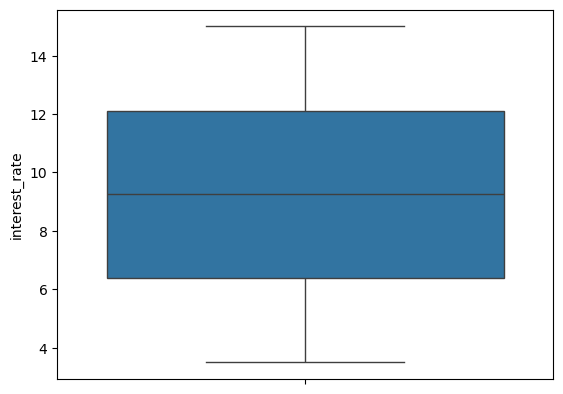

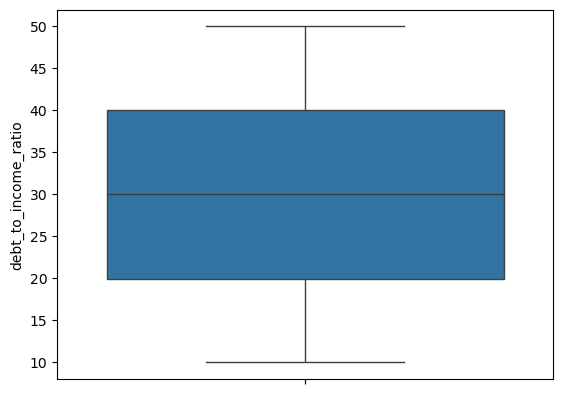

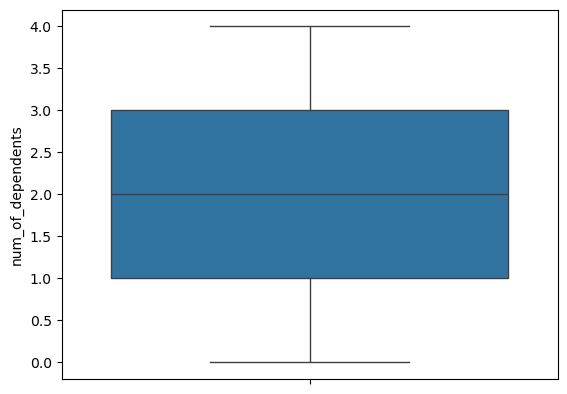

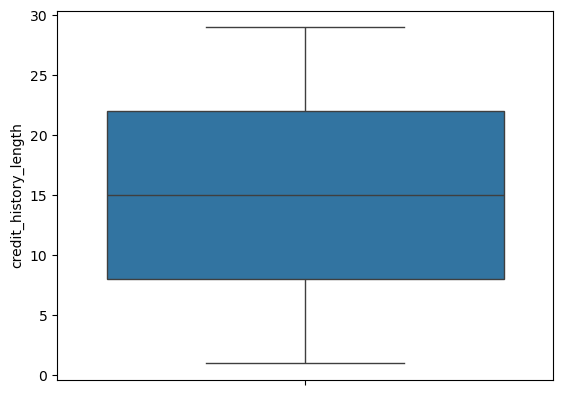

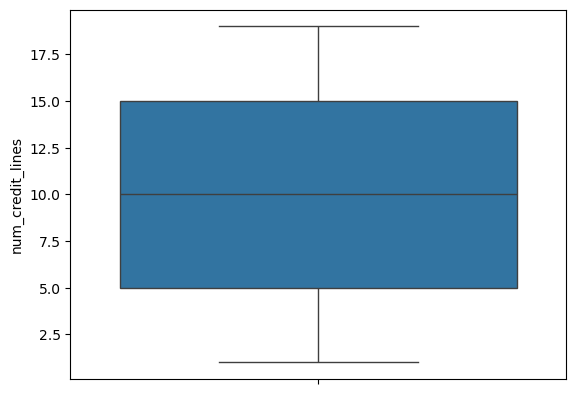

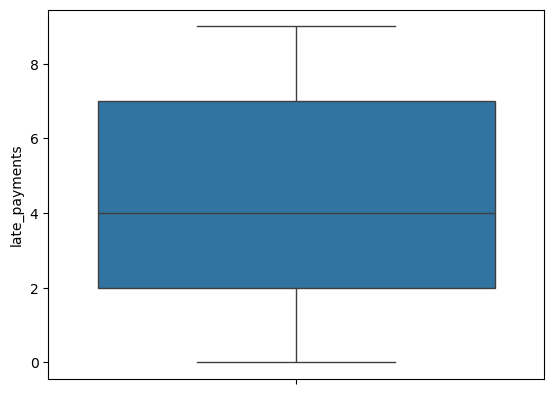

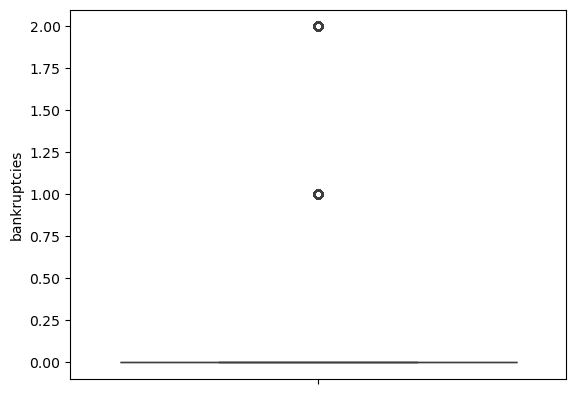

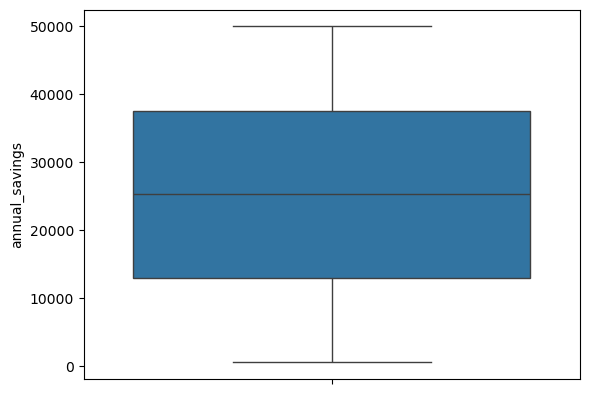

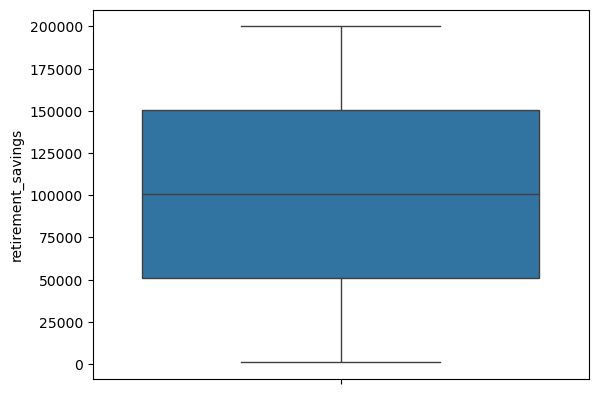

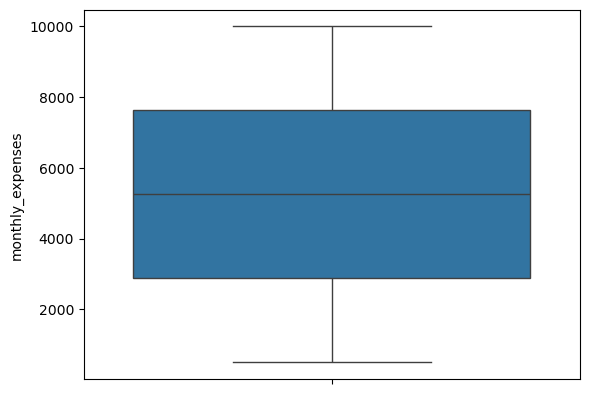

In [8]:
# check the outliers with boxplot
for cols in number_column:
    sns.boxplot(dataset[cols])
    plt.show()    

In [9]:
# check for outliers with IQR method

iq3 = np.quantile(dataset[number_column],0.75, axis=0)
iq1 = np.quantile(dataset[number_column],0.25, axis=0)
iqr = iq3-iq1
ul = iq3+1.5*iqr
ll = iq1-1.5*iqr

((dataset[number_column]>ul )|( dataset[number_column]<ll)).sum()

age                         0
income                      0
loan_amount                 0
credit_score                0
default(y)                  0
loan_term                   0
interest_rate               0
debt_to_income_ratio        0
num_of_dependents           0
credit_history_length       0
num_credit_lines            0
late_payments               0
bankruptcies             4944
annual_savings              0
retirement_savings          0
monthly_expenses            0
dtype: int64

bankruptcies
0    95056
1     3916
2     1028
Name: count, dtype: int64


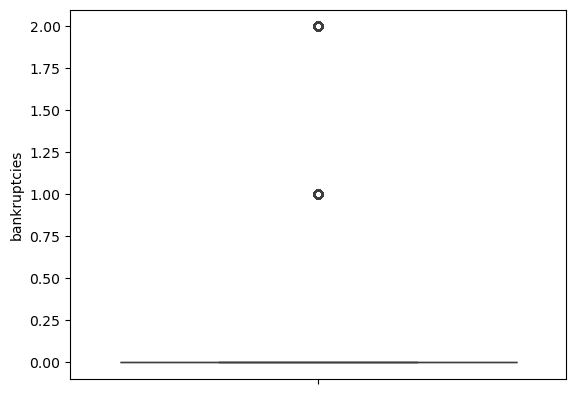

In [10]:
# bankrupties containes only 3 different values
print(dataset["bankruptcies"].value_counts())
sns.boxplot(dataset["bankruptcies"])
plt.show()

In [11]:
# checking the value counts of catergorical column
for cols in categorical_column:
    print()
    print(dataset[cols].value_counts())


employment_status
employed         70310
unemployed       19844
self-employed     9846
Name: count, dtype: int64

education_level
high_school    39963
bachelor       35206
master         19857
phd             4974
Name: count, dtype: int64

home_ownership
rent        49973
own         29898
mortgage    20129
Name: count, dtype: int64

marital_status
married     49954
single      39926
divorced    10120
Name: count, dtype: int64


In [12]:
# to check dataset is balanced or not. Dataset is balanced
dataset["default(y)"].value_counts(normalize=True)

default(y)
1    0.50094
0    0.49906
Name: proportion, dtype: float64

In [13]:
dataset["default(y)"].value_counts()

default(y)
1    50094
0    49906
Name: count, dtype: int64

In [14]:
# check the correlation between numerical features. There is no multicollinearity between features
dataset.corr(numeric_only=True)

,age,income,loan_amount,credit_score,default(y),loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,credit_history_length,num_credit_lines,late_payments,bankruptcies,annual_savings,retirement_savings,monthly_expenses
age,1.000000,0.001523,0.002053,0.003709,0.001084,0.003918,0.001894,0.004350,-0.004243,0.001007,-0.002773,-0.004052,-0.001057,-0.008502,-0.003290,-0.001569
income,0.001523,1.000000,0.004583,0.004645,0.004136,-0.003255,-0.002776,0.007808,0.002006,-0.001694,0.002391,0.002208,-0.005555,0.005925,0.002597,-0.000709
loan_amount,0.002053,0.004583,1.000000,-0.003172,0.001014,-0.001243,-0.000214,0.000209,0.003182,-0.003486,-0.006456,0.000987,0.001874,0.001080,-0.000097,0.001557
credit_score,0.003709,0.004645,-0.003172,1.000000,-0.001284,-0.000580,0.004082,-0.003426,-0.003590,-0.004999,-0.004368,0.003207,-0.000203,0.000400,-0.001162,0.000456
default(y),0.001084,0.004136,0.001014,-0.001284,1.000000,-0.008484,0.004053,-0.000637,-0.004194,0.002197,-0.001097,-0.000559,0.002483,-0.004380,0.001988,-0.000060
loan_term,0.003918,-0.003255,-0.001243,-0.000580,-0.008484,1.000000,0.001616,0.001403,0.002643,-0.002278,-0.001763,-0.002433,0.001463,-0.002778,-0.002274,0.004003
interest_rate,0.001894,-0.002776,-0.000214,0.004082,0.004053,0.001616,1.000000,-0.005752,0.002976,-0.005120,-0.001824,-0.002259,0.001185,0.001345,-0.001465,-0.000212
debt_to_income_ratio,0.004350,0.007808,0.000209,-0.003426,-0.000637,0.001403,-0.005752,1.000000,0.000900,-0.001241,0.002744,0.001780,0.003669,-0.003357,-0.000992,-0.000519
num_of_dependents,-0.004243,0.002006,0.003182,-0.003590,-0.004194,0.002643,0.002976,0.000900,1.000000,-0.002200,0.000942,0.005200,0.004835,0.003250,0.001257,-0.001803
credit_history_length,0.001007,-0.001694,-0.003486,-0.004999,0.002197,-0.002278,-0.005120,-0.001241,-0.002200,1.000000,-0.003069,0.002846,-0.003133,-0.003210,-0.000886,-0.000544


<Axes: >

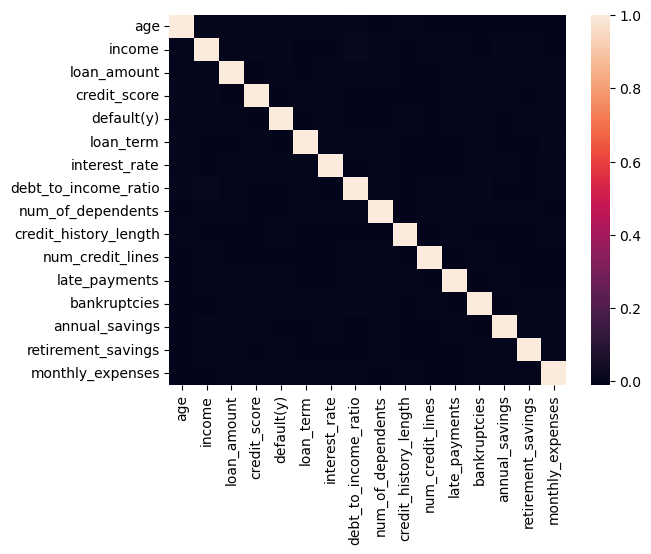

In [15]:
# graphical representation for correlation between numerical features
sns.heatmap(dataset.corr(numeric_only=True))

In [ ]:
# check the pairwise relationship between features via graphs
sns.pairplot(dataset)

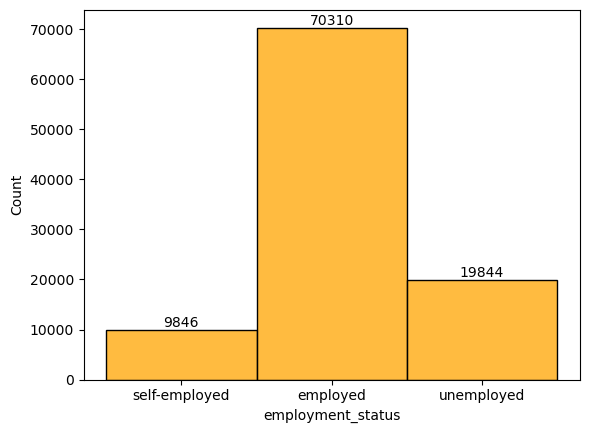

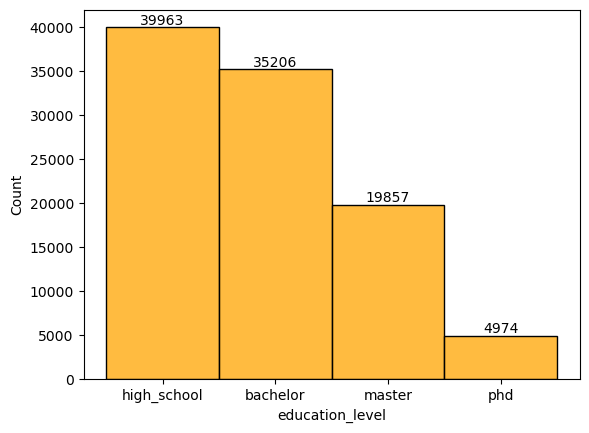

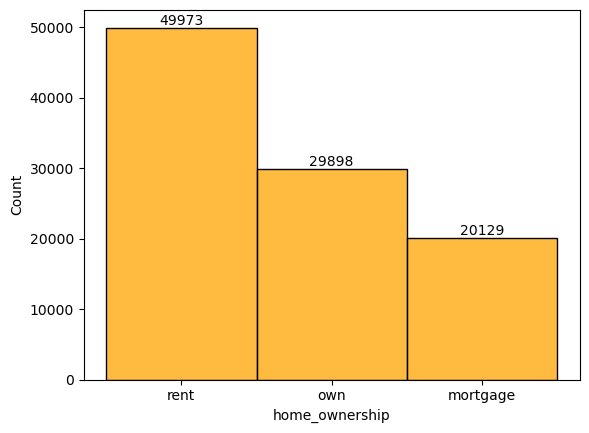

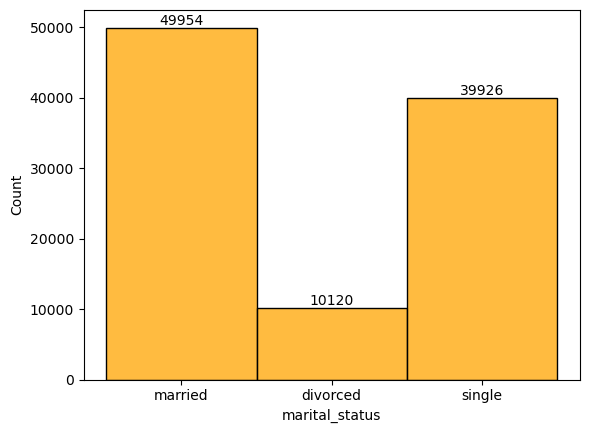

In [17]:
# check the distribution of  values of categorical features
for cols in categorical_column:
    ax = sns.histplot(dataset[cols], color="orange")
    for i in ax.containers:
        ax.bar_label(i)
    plt.show()    
# insights -
# 70% of the applicants are employee
# no of applicants with education level highschool > bachelor > master > phd
# nearly 50% of the applicants are living on rent
# Approximately 50% of the applicants are married and 10 % of applicants are divorced


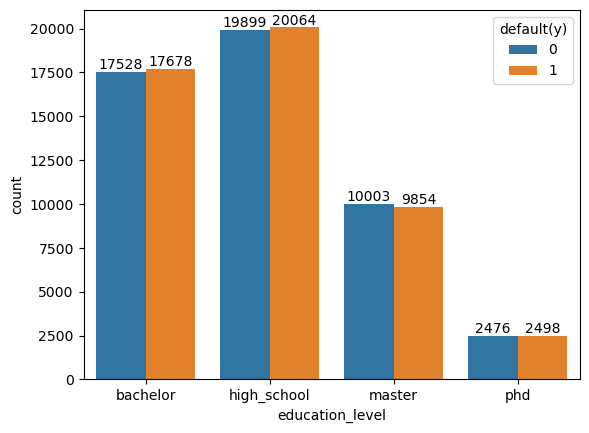

In [18]:
# In each education category no of  default and non-default applicants is nearly equal 
ed_df = dataset.groupby(by=["education_level","default(y)"]).size().reset_index().rename(columns={0:"count"})
ax= sns.barplot(x="education_level", y="count", hue="default(y)", data=ed_df)
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

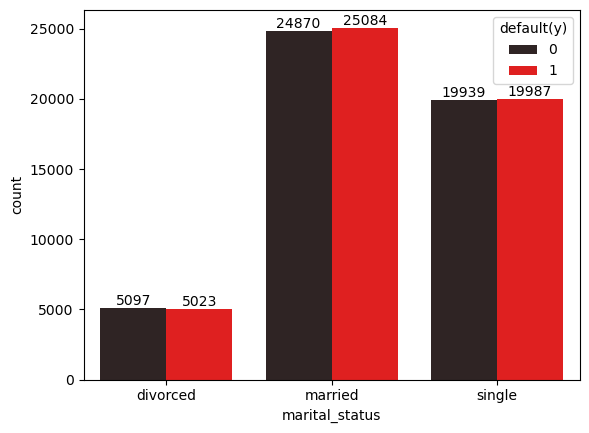

In [19]:
# In each marital status category no of  default and non-default applicants is nearly equal 

mr_df = dataset.groupby(by=["marital_status","default(y)"]).size().reset_index().rename(columns={0:"count"})
ax= sns.barplot(x="marital_status", y="count", hue="default(y)", data=mr_df, palette="dark:red")
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

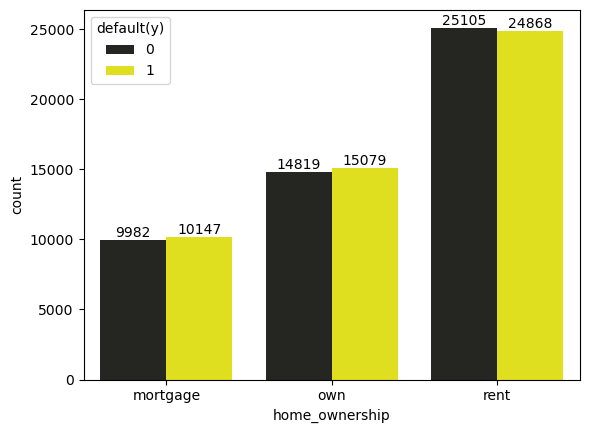

In [20]:
# In each home ownership category no of  default and non-default applicants is nearly equal 

ho_df = dataset.groupby(by=["home_ownership","default(y)"]).size().reset_index().rename(columns={0:"count"})
ax= sns.barplot(x="home_ownership", y="count", hue="default(y)", data=ho_df, palette="dark:yellow")
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

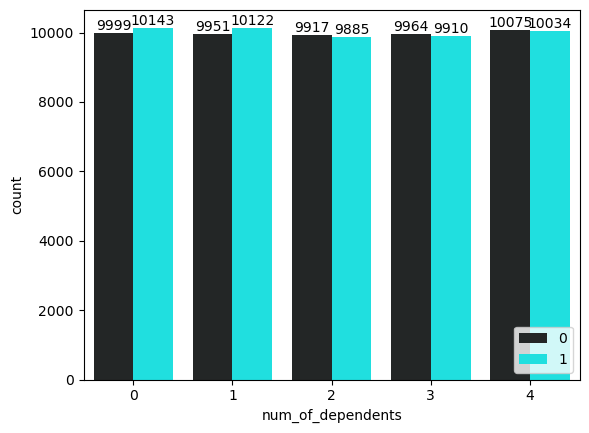

In [21]:
# In each dependent category no of  default and non-default applicants is nearly equal 

dp_df = dataset.groupby(by=["num_of_dependents","default(y)"]).size().reset_index().rename(columns={0:"count"})
ax= sns.barplot(x="num_of_dependents", y="count", hue="default(y)", data=dp_df, palette="dark:cyan")
for i in ax.containers:
    ax.bar_label(i)
plt.legend(loc = "lower right")    
plt.show()    

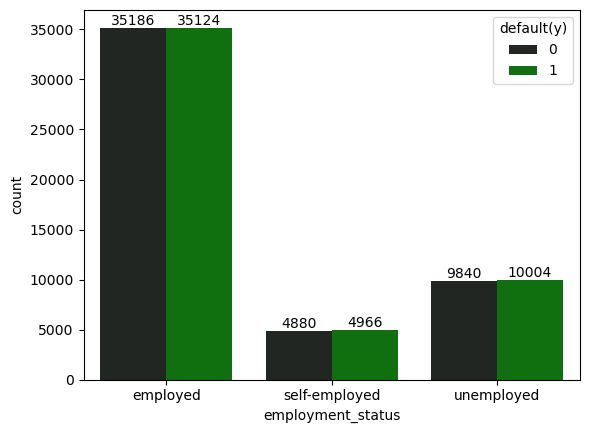

In [22]:
# applicant who are employed are having better non-default status compared to other category 
em_df = dataset.groupby(by=["employment_status","default(y)"]).size().reset_index().rename(columns={0:"count"})
ax= sns.barplot(x="employment_status", y="count", hue="default(y)", data=em_df, palette="dark:green")
for i in ax.containers:
    ax.bar_label(i)
plt.show()    

In [23]:
# Label encoding the education level as it is an ordinal feature
lb_encoder = LabelEncoder()
dataset["education_level"] = lb_encoder.fit_transform(dataset["education_level"])


In [24]:
# one hot encoding other nomial categorical feature
dataset = pd.get_dummies(dataset, columns=["employment_status","home_ownership","marital_status"], dtype=int, drop_first=True)

In [25]:
# separating target variable and independent variable
dataset_X = dataset.drop("default(y)", axis=1)
dataset_Y = dataset["default(y)"]


In [26]:
# scaling the dataset to make values of all feature in same level
std_scaler = StandardScaler()
dataset_X = pd.DataFrame(std_scaler.fit_transform(dataset_X), columns = dataset_X.columns)
dataset_X

,age,income,loan_amount,credit_score,loan_term,interest_rate,debt_to_income_ratio,num_of_dependents,education_level,credit_history_length,...,bankruptcies,annual_savings,retirement_savings,monthly_expenses,employment_status_self-employed,employment_status_unemployed,home_ownership_own,home_ownership_rent,marital_status_married,marital_status_single
0,-0.351667,0.494857,0.109608,0.726401,-0.001507,0.205788,0.090819,-1.408996,0.062504,-0.952967,...,3.394855,0.002599,1.644025,0.286004,3.025956,-0.497561,-0.653064,1.00054,1.00092,-0.815238
1,-0.509269,1.307221,-0.751586,0.026442,0.705875,1.316884,-0.704833,-1.408996,0.062504,-0.475045,...,-0.215617,1.089794,0.909434,-0.434065,-0.330474,-0.497561,1.531243,-0.99946,1.00092,-0.815238
2,0.357542,1.120845,-1.620420,-1.398699,-1.416270,-0.777081,-1.507576,-0.703563,-1.094766,1.078202,...,-0.215617,0.675732,-0.578787,-0.877858,-0.330474,-0.497561,-0.653064,-0.99946,-0.99908,-0.815238
3,-0.351667,-1.727409,-1.581513,0.303903,0.705875,1.078357,-1.111331,-0.703563,1.219774,-0.355565,...,3.394855,-0.643392,-0.032626,0.900600,-0.330474,2.009803,1.531243,-0.99946,1.00092,-0.815238
4,0.121139,0.758529,0.863842,0.259762,-1.416270,-1.549974,0.509910,0.707302,0.062504,1.436644,...,-0.215617,-1.371368,-1.015445,1.005709,3.025956,-0.497561,1.531243,-0.99946,-0.99908,1.226635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,-1.533682,-0.352799,1.562758,-0.200571,0.705875,1.679892,0.384862,-1.408996,-1.094766,-0.594526,...,-0.215617,1.232795,-0.019747,-0.176402,-0.330474,-0.497561,-0.653064,1.00054,1.00092,-0.815238
99996,-0.666871,0.907015,0.054996,1.420054,0.705875,0.852942,-0.551479,0.707302,-1.094766,0.958722,...,-0.215617,-0.872655,0.951760,-0.174212,-0.330474,-0.497561,-0.653064,1.00054,1.00092,-0.815238
99997,0.830348,1.639831,1.569761,1.464195,-0.001507,-1.125158,-1.338707,0.707302,0.062504,0.839241,...,-0.215617,0.068945,-0.252451,-0.366182,-0.330474,-0.497561,-0.653064,1.00054,1.00092,-0.815238
99998,1.303154,-0.872435,-1.463801,-1.228439,0.705875,-1.451506,-0.159749,0.001869,0.062504,-0.833487,...,-0.215617,0.904574,-0.466377,0.933446,-0.330474,-0.497561,1.531243,-0.99946,1.00092,-0.815238


In [27]:
# preparing the train and test dataset before model building
X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_Y, test_size=0.2, random_state=87)


In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80000, 22), (80000,), (20000, 22), (20000,))

In [29]:
# Base line model building using logistic regression
lr_model =  LogisticRegression()



In [30]:
# defining a function for training and evaluation

def fit_predict(model):
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    return y_pred

def evaluate(y_pred):
    print(" Accuracy Score percentage--", accuracy_score(y_test, y_pred)*100)
    print(" Confusion Matrix --\n", confusion_matrix(y_test, y_pred))
    print(" Classification report \n", classification_report(y_test, y_pred))
    

In [31]:
print(" Evaluation metrics for Baseline model Logistic Regression \n" )
evaluate(fit_predict(lr_model))

 Evaluation metrics for Baseline model Logistic Regression 

 Accuracy Score percentage-- 49.635
 Confusion Matrix --
 [[5125 4742]
 [5331 4802]]
 Classification report 
               precision    recall  f1-score   support

           0       0.49      0.52      0.50      9867
           1       0.50      0.47      0.49     10133

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



In [32]:
model_list = [DecisionTreeClassifier(),KNeighborsClassifier(),GaussianNB(),XGBClassifier(),AdaBoostClassifier(),RandomForestClassifier()]
for model in model_list:
    print(model,"performance evaluation")
    evaluate(fit_predict(model))
    
    

DecisionTreeClassifier() performance evaluation
 Accuracy Score percentage-- 50.105
 Confusion Matrix --
 [[5002 4865]
 [5114 5019]]
 Classification report 
               precision    recall  f1-score   support

           0       0.49      0.51      0.50      9867
           1       0.51      0.50      0.50     10133

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

KNeighborsClassifier() performance evaluation
 Accuracy Score percentage-- 50.080000000000005
 Confusion Matrix --
 [[4920 4947]
 [5037 5096]]
 Classification report 
               precision    recall  f1-score   support

           0       0.49      0.50      0.50      9867
           1       0.51      0.50      0.51     10133

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000

GaussianNB() perform

In [ ]:
# Hyperparameter tuning


In [33]:
# cross validation score
rf_model = RandomForestClassifier()
cross_score = cross_val_score(rf_model, X_train, y_train, cv=10)
print(cross_score)
print(cross_score.max())

[0.501875 0.496125 0.4965   0.49025  0.506625 0.5045   0.498375 0.49875
 0.496875 0.493125]
0.506625


In [ ]:
# hyperparameter tuning by RandomizedSeachCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 8)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion':['entropy','gini']}


rf_randomcv = RandomizedSearchCV(estimator=rf_model, param_distributions=random_grid,n_iter=50,cv=3,verbose=2,
                               random_state=87,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train, y_train)

print(rf_randomcv.best_params_)


In [34]:
best_rf_model = RandomForestClassifier(n_estimators= 200, min_samples_split= 5, min_samples_leaf= 2, max_features= 'auto', max_depth= 890, criterion= 'entropy')

In [36]:
evaluate(fit_predict(best_rf_model))

 Accuracy Score percentage-- 50.305
 Confusion Matrix --
 [[4910 4957]
 [4982 5151]]
 Classification report 
               precision    recall  f1-score   support

           0       0.50      0.50      0.50      9867
           1       0.51      0.51      0.51     10133

    accuracy                           0.50     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.50      0.50     20000



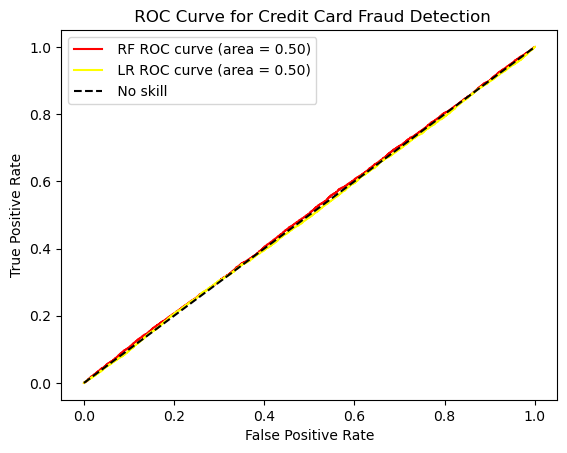

In [37]:
# roc curve for RandomForest and Logistic Regression
y_pred_proba= best_rf_model.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
y_pred_proba_lr= lr_model.predict_proba(X_test)[:,1]
fpr_lr, tpr_lr, threshold_lr = roc_curve(y_test, y_pred_proba_lr)
roc_auc = auc(fpr, tpr)
roc_auc_lr = auc(fpr_lr,tpr_lr)
plt.figure()
plt.plot(fpr, tpr, color = "red",label = " RF ROC curve (area = %.2f)" %roc_auc)
plt.plot(fpr_lr, tpr_lr, color="yellow",label = " LR ROC curve (area = %.2f)" %roc_auc_lr)
plt.plot([0,1],[0,1],"k--", label = " No skill")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" ROC Curve for Credit Card Fraud Detection")
plt.legend()
plt.show()


# Conclusion
## Machine Learning Model for predicting the Credit Card Default

We are given a dataset of 1 lakh rows which consist of 20 independent features and 1 target variable. On the basis of independent features our machine learning model predicts whether an applicant will default or not.  Dataset was free from missing values , duplicate values and outliers. Dataset was balanced. EDA is performed on datasets.Mostly all categories of the features are having nearly equal number of default and non-default cases. Multi-collinearity is not observed in the features. No features are highly correlated. 70% of the applicant are employee of companies. Most of the applicant of the given dataset are having educational qualification as High school. Most of the applicants are living on rented house.

We have used various machine learning algorithm for the building the model. We used base line ml algorithm of LogisticRegression, ensemble ml algorithm of Random Forest and also used boosting techniques like XGBoost while making the model. We got the highest accuracy 50.30% with RandomForest Classifier .

We also used hyperparameter tuning technique like RamdomizedSeachCV, cross validation score to improve the accuracy however it is not showing very good results.Evaluation metrics like confusion matrix, F1 Score, Precision and Recall is also evaluated for all models.

Model can be used in various use cases like  Loan approval System on the basis of customer default. Model can also be used to classify customer in different categories like low, medium and high risk on the bases of default.  



In [3]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
